### Grid Searching Decision Trees

This try-it focuses on performing a grid search with a `DecisionTreeClassifier`.  As mentioned in the lectures, the grid search for a tree model can get large very easily. In addition to using `GridSearchCV`, scikitlearn implements additional tools that can save energy and offer alternatives to the brute force exhaustive search.  Below, you will compare the performance of some of these alternatives and discuss the time these searches take.  Note that this will be in large part determined by your personal computing power however the relative speed of the searches should be consistent.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_halving_search_cv
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV

In [3]:
params = {'max_depth': [],
         'min_samples_split': [],
          'criterion': [],
          'min_samples_leaf': []
         }

In [4]:
dtree = DecisionTreeClassifier()

### Comparing Grid Searches

Below, explore the four grid search options using the same parameter selections for the `DecisionTreeClassifier`. All of the grid searching tools have a `.cv_results_` attribute after fitting that contains information after fitting including time.  Use this to compare the time of each search and discuss what you believe the "best" approach to identifying the hyperparameters of the model are between:

- `GridSearchCV`
- `RandomizedSearchCV`
- `HalvingGridSearchCV`
- `HalvingRandomSearchCV`

Share your results in a plot comparing the different times for searching across the different parameters as well as the score of the different estimators that resulted from the grid search.  

To compare the four grid search methods (GridSearchCV, RandomizedSearchCV, HalvingGridSearchCV, HalvingRandomSearchCV), we'll follow these steps:

Load the data and perform preprocessing including OneHotEncoding of categorical variables.
Define the hyperparameter grid for the DecisionTreeClassifier.
Apply each of the four grid search methods to find the best hyperparameters.
Compare the results in terms of time taken and accuracy.
Plot the comparison results.
Let's implement this step by step:



Step 1: Load and Preprocess the Data

In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('data/Whickham.txt')
data

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64
...,...,...,...
1309,Alive,Yes,35
1310,Alive,No,33
1311,Alive,Yes,21
1312,Alive,No,46


In [6]:


# Identify categorical columns
categorical_features = data.select_dtypes(include=['object']).columns

# Define the OneHotEncoder
onehotencoder = OneHotEncoder()

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', onehotencoder, categorical_features)
    ],
    remainder='passthrough'
)

# Apply the transformation
data_transformed = preprocessor.fit_transform(data)

# Convert the result back to a DataFrame
data_transformed = pd.DataFrame(data_transformed, columns=preprocessor.get_feature_names_out())
data_transformed

,cat__outcome_Alive,cat__outcome_Dead,cat__smoker_No,cat__smoker_Yes,remainder__age
0,1.0,0.0,0.0,1.0,23.0
1,1.0,0.0,0.0,1.0,18.0
2,0.0,1.0,0.0,1.0,71.0
3,1.0,0.0,1.0,0.0,67.0
4,1.0,0.0,1.0,0.0,64.0
...,...,...,...,...,...
1309,1.0,0.0,0.0,1.0,35.0
1310,1.0,0.0,1.0,0.0,33.0
1311,1.0,0.0,0.0,1.0,21.0
1312,1.0,0.0,1.0,0.0,46.0


In [7]:

# Define features and target
X = data_transformed.drop(columns=['cat__outcome_Alive'])
y = data_transformed['cat__outcome_Alive']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Step 2: Define the Hyperparameter Grid

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameter grid
param_grid = {
    'max_depth': range(1, 21),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


Step 3: Apply Grid Search Methods

In [9]:
#GridSearchCV

from sklearn.model_selection import GridSearchCV
import time

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)

# Fit the model
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Record the time taken and best score
grid_search_time = end_time - start_time
grid_search_best_score = grid_search.best_score_
grid_search_cv_results = grid_search.cv_results_

print(grid_search_time)



1.306854486465454


In [10]:
# RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_distributions=param_grid, n_iter=50, cv=5, n_jobs=-1, random_state=42)

# Fit the model
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()

# Record the time taken and best score
random_search_time = end_time - start_time
random_search_best_score = random_search.best_score_
random_search_cv_results = random_search.cv_results_

print(random_search_time)

0.1744840145111084


In [11]:
# HalvingGridSearchCV

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# Initialize HalvingGridSearchCV
halving_grid_search = HalvingGridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, random_state=42)

# Fit the model
start_time = time.time()
halving_grid_search.fit(X_train, y_train)
end_time = time.time()

# Record the time taken and best score
halving_grid_search_time = end_time - start_time
halving_grid_search_best_score = halving_grid_search.best_score_
halving_grid_search_cv_results = halving_grid_search.cv_results_

print(halving_grid_search_time)

0.7466862201690674


In [12]:
# HalvingRandomSearchCV

from sklearn.model_selection import HalvingRandomSearchCV

# Initialize HalvingRandomSearchCV
halving_random_search = HalvingRandomSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, random_state=42)

# Fit the model
start_time = time.time()
halving_random_search.fit(X_train, y_train)
end_time = time.time()

# Record the time taken and best score
halving_random_search_time = end_time - start_time
halving_random_search_best_score = halving_random_search.best_score_
halving_random_search_cv_results = halving_random_search.cv_results_


print(halving_random_search_time)

0.27213168144226074


Step 4: Compare the Results
We'll compile the results into a DataFrame and plot the comparisons.

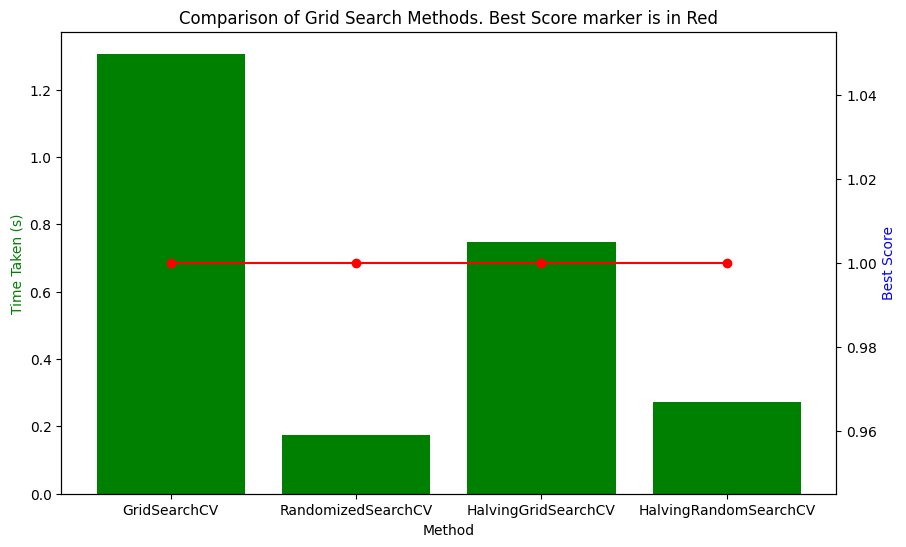

In [16]:
import matplotlib.pyplot as plt

# Compile the results
results = pd.DataFrame({
    'Method': ['GridSearchCV', 'RandomizedSearchCV', 'HalvingGridSearchCV', 'HalvingRandomSearchCV'],
    'Best Score': [grid_search_best_score, random_search_best_score, halving_grid_search_best_score, halving_random_search_best_score],
    'Time Taken (s)': [grid_search_time, random_search_time, halving_grid_search_time, halving_random_search_time]
})

# Plot the results
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()
ax1.bar(results['Method'], results['Time Taken (s)'], color='g')
ax2.plot(results['Method'], results['Best Score'], color='r', marker='o')

ax1.set_xlabel('Method')
ax1.set_ylabel('Time Taken (s)', color='g')
ax2.set_ylabel('Best Score', color='b')

plt.title('Comparison of Grid Search Methods. Best Score marker is in Red')
plt.show()
